# Introductory tutorial
In this tutorial, we will cover how to read in data, plot a reaction pathway and alter the reaction conditions.
We will first locate our example inputs; one being a Cathub SQL reaction database.
The second input method is a hand-written tab separated values (tsv) file.


In [3]:
# Locate data
import os
sql_input = os.getcwd()+'/TangRevised2018.db'
tsv_input = os.getcwd()+'/TangRevised2018.tsv'

# import module
from cathub.reaction_networks import *

# plot inline
%matplotlib inline

# show more pandas columns
pd.set_option('display.max_columns',10)


The reaction_networks object can be instantiated using CatHub SQL reaction data bases:

In [4]:
# read input from SQL
rn = ReactionNetwork.init_from_db(sql_input)

# In this case, a pandas data frame is created automatically, which is available through 
# ReactionNetwork.df:
print(rn.df.head())


  system facet          reactants         products  reaction_energy  \
0   Cu36   100    [COstar, H2gas]        [COHstar]         0.988063   
1   Cu36   100  [H2gas, HCOHstar]      [H2COHstar]        -0.790432   
2   Cu36   100   [H2gas, CHOstar]       [HCOHstar]         0.322812   
3   Cu36   100      [star, COgas]         [COstar]        -0.629295   
4   Cu36   100   [H2gas, COHstar]  [Cstar, H2Ogas]         0.083782   

           labels  
0  $Cu_{36}$(100)  
1  $Cu_{36}$(100)  
2  $Cu_{36}$(100)  
3  $Cu_{36}$(100)  
4  $Cu_{36}$(100)  


The reaction_networks object can be instantiated using tsv input:   

In [5]:
# Read input from tsv, note that providing labels (see above print-out) is optional!
rn = ReactionNetwork.init_from_df(tsv_input)
print(rn.df.head())
    

  system  facet          reactants         products  reaction_energy  \
0   Cu36    100    [COstar, H2gas]        [COHstar]         0.988063   
1   Cu36    100  [H2gas, HCOHstar]      [H2COHstar]        -0.790432   
2   Cu36    100   [H2gas, CHOstar]       [HCOHstar]         0.322812   
3   Cu36    100      [star, COgas]         [COstar]        -0.629295   
4   Cu36    100   [H2gas, COHstar]  [Cstar, H2Ogas]         0.083782   

           labels  
0  $Cu_{36}$(100)  
1  $Cu_{36}$(100)  
2  $Cu_{36}$(100)  
3  $Cu_{36}$(100)  
4  $Cu_{36}$(100)  


## Plot reaction pathway
In order to create the plot, we have to select a reaction pathway.
Let us examine the set of elementary reaction available in the reaction network:



In [6]:
rn = ReactionNetwork.init_from_db(sql_input)

for reaction in rn.unique_reactions:
    print(reaction)


['COstar', 'H2gas', '-->', 'CHOstar']
['COstar', 'H2gas', '-->', 'COHstar']
['H2gas', 'CHOstar', '-->', 'HCOHstar']
['H2gas', 'CHstar', '-->', 'CH2star']
['H2gas', 'CO2gas', 'star', '-->', 'COOHstar']
['H2gas', 'CO2gas', 'star', '-->', 'HCOOstar']
['H2gas', 'COHstar', '-->', 'Cstar', 'H2Ogas']
['H2gas', 'Cstar', '-->', 'CHstar']
['H2gas', 'HCOHstar', '-->', 'H2COHstar']
['H2gas', 'HCOOstar', '-->', 'HCOOHstar']
['star', 'COgas', '-->', 'COstar']


From the unique reactions, we can create a list of intermediates
and plot the reaction path as follows:


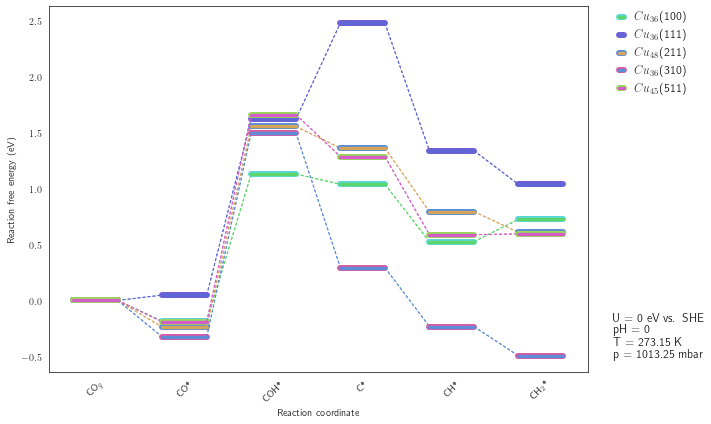

In [7]:
# list of unique intermediates, defining the rection pathway:
intermediates = ['COgas', 'COstar', 'COHstar', 'Cstar', 'CHstar', 'CH2star']

# set the intermediates
rn.set_intermediates(intermediates=intermediates)

# Returns a matplotlib figure object that is ready to be saved or shown.
fig = rn.plot_network() 


We can further specify betas and whether the intermediate is a transition state:
(The first beta in the list is for the formation of the first intermediate 'COgas'.
In this case, this is the initial state and beta should therefore be zero. 
Note that the transition state in this reaction is just an example, not a real transition state.)


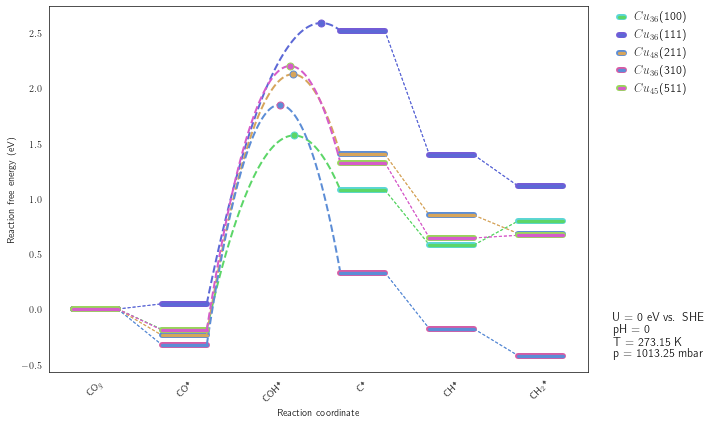

In [8]:
ts = [False, False, True, False, False, False]
betas = [0, 0, 1, 1, 1, 1]
rn.set_intermediates(betas=betas, transition_states=ts)
fig = rn.plot_network() 


## Reaction conditions
We can vary the reaction conditions, whereby the potential is applied 
to electrochemical steps, according to their beta.
By default, standard conditions are used.
It is possible to change the 
conditions using the set_conditions() function.
The conditions can be reset to standard conditions using use_standard_conditions().


In [9]:
# Standart conditions
print('(1) Reaction conditions'+str(rn.reaction_conditions))

# You can change all, various or one condition(s) at a time
rn.set_conditions(temperature=400,  # K
                  pressure=None,    # mbar
                  pH=7,             # electrolyte pH 
                  )
print('(2) Reaction conditions'+str(rn.reaction_conditions))

# If you change a condition later, the previous settings are kept:
rn.set_conditions(potential=-1.     # U vs. SHE
                  )
print('(3) Reaction conditions'+str(rn.reaction_conditions))

# You can reset all condition to standard conditions
rn.use_standard_conditions()
print('(4) Reaction conditions'+str(rn.reaction_conditions))


(1) Reaction conditions{'temperature': 273.15, 'pressure': 1013.25, 'pH': 0, 'potential': 0}
(2) Reaction conditions{'temperature': 400, 'pressure': 1013.25, 'pH': 7, 'potential': 0}
(3) Reaction conditions{'temperature': 400, 'pressure': 1013.25, 'pH': 7, 'potential': -1.0}
(4) Reaction conditions{'temperature': 273.15, 'pressure': 1013.25, 'pH': 0, 'potential': 0}


We can do all at once, in a few lines:


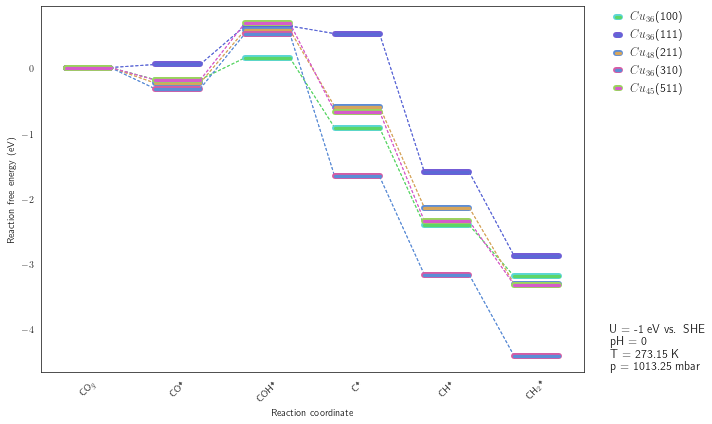

In [10]:
# Define intermediates, transition states, and betas
intermediates = ['COgas', 'COstar', 'COHstar', 'Cstar', 'CHstar', 'CH2star']
ts = [False, False, False, False, False, False]     # this would be the default anyways
betas = [0, 0, 1, 1, 1, 1]

# Instantiate with all information
rn = ReactionNetwork.init_from_db(sql_input,
                                  intermediates=intermediates,
                                  transition_states=ts,
                                  betas=betas,
                                  potential=-1,
                                  pH=0)
fig = rn.plot_network() 


## Intermediate stability corrections
Corrections to the intermediate and transition state stabilities can be supplied. 
The default is having no corrections at all. 
There are several types of corrections:

(1) net_corrections: 
Summarizing all corrections. If this is supplied, the other specified corrections are ignored.

(2) dft_corrections: 
For instance, functional-based corrections.

(3) field_corrections: 
Stabilization from field effects

(4) overbinding_corrections: 
Functional-dependent overbinding, e.g. applied to CO intermediates

(5) solvation_corrections: 
E.g. stabilization of a given intermediate through solvation effects.

### How to set intermediate parameters and corrections:
(a) Set parameters and corrections while instantiation

In [12]:
# Define intermediates and corrections as an example: 
intermediates = ['COgas', 'COstar', 'COHstar', 'Cstar', 'CHstar', 'CH2star']
overbinding = [0.2, 0.1, 0, 0, 0, -0.1]     # Values in eV

# Instantiate
rn = ReactionNetwork.init_from_db(sql_input,
                                  intermediates=intermediates,
                                  overbinding_corrections=overbinding)
# Show parameters
print(rn.intermediate_parameters)


  intermediate  betas  transition_state  net_corrections  dft_corrections  \
0        COgas    0.0             False              0.0              0.0   
1       COstar    0.0             False              0.0              0.0   
2      COHstar    0.0             False              0.0              0.0   
3        Cstar    0.0             False              0.0              0.0   
4       CHstar    0.0             False              0.0              0.0   
5      CH2star    0.0             False              0.0              0.0   

   field_corrections  overbinding_corrections  solvation_corrections  
0                0.0                      0.2                    0.0  
1                0.0                      0.1                    0.0  
2                0.0                      0.0                    0.0  
3                0.0                      0.0                    0.0  
4                0.0                      0.0                    0.0  
5                0.0              

(b)  Set parameters and corrections from file:
The input should follow the print-out above, with tab separated values.


In [15]:
rn = ReactionNetwork.init_from_db(sql_input)
rn.intermediate_parameters_from_file(filename=os.getcwd()+'/intermediate_parameters.tsv')
print(rn.intermediate_parameters)


  intermediate  betas  transition_state  net_corrections  dft_corrections  \
0        COgas    0.0             False              0.3              0.0   
1       COstar    0.0             False              0.3              0.0   
2      COHstar    0.0             False              0.3              0.0   
3        Cstar    0.0             False              0.3              0.0   
4       CHstar    0.0             False              0.3              0.0   
5      CH2star    0.0             False             -0.3              0.0   

   field_corrections  overbinding_corrections  solvation_corrections  
0                0.0                      0.2                    0.0  
1                0.0                      0.1                    0.0  
2                0.0                      0.0                    0.0  
3                0.0                      0.0                    0.0  
4                0.0                      0.0                    0.0  
5                0.0              

All corrective values provided are given in eV. It is possible to just provide net corrections.
If net corrections are provided, all other corrective entries are ignored.
If no net corrections are provided, then the net corrections are computed as the sum of all 
sub-corrections (i.e. overbinding, field etc.)

